In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
def show_images(gen):
    image_batch, _ =next(gen)
    predictions = model.predict(image_batch)
    
    plt.figure(figsize=(20,20))
    for i in range(gen.batch_size):
        plt.subplot(gen.batch_size//8 +1, 8,i+1)
        plt.imshow(image_batch[i])
        plt.title(classes[predictions[i].argmax()])
        plt.axis('off')

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   rotation_range=0.2,
                                   horizontal_flip=True)
vali_datagen = ImageDataGenerator(rescale=1./255)
pred_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
shape = (128,128)
batch = 32
seed = 42

In [5]:
train_dir = './seg_train/seg_train'
vali_dir = './seg_test/seg_test'
pred_dir = './seg_pred'

In [6]:
train_gen = train_datagen.flow_from_directory(train_dir,
                                              classes=None,
                                              shuffle=True,
                                              target_size=shape,
                                              batch_size=batch,
                                              seed=seed)
vali_gen = vali_datagen.flow_from_directory(vali_dir,
                                            target_size=shape,
                                            batch_size=batch)
pred_gen = pred_datagen.flow_from_directory(pred_dir,
                                            target_size=shape,
                                            batch_size=batch)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


In [7]:
classes = dict()
for k,v in train_gen.class_indices.items():
    classes[v] = k
classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

In [8]:
model = Sequential()
model.add(Conv2D(64, 3, input_shape=(shape+(3, ))))
model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(128, 3))
model.add(Conv2D(128, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dense(6,activation='softmax'))

In [9]:
earlystopping = EarlyStopping(monitor = 'val_loss', 
                              patience = 3,
                              verbose = 1)
lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                       patience=2, min_lr=0.00003)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
hist = model.fit(train_gen, epochs=20, validation_data=vali_gen, callbacks=[earlystopping, lr])

Epoch 1/20
439/439 [==============================] - 165s 376ms/step - loss: 4.0920 - accuracy: 0.4823 - val_loss: 2.1829 - val_accuracy: 0.4323
Epoch 2/20
439/439 [==============================] - 157s 358ms/step - loss: 1.0002 - accuracy: 0.6317 - val_loss: 1.1134 - val_accuracy: 0.6253
Epoch 3/20
439/439 [==============================] - 167s 381ms/step - loss: 0.8977 - accuracy: 0.6671 - val_loss: 1.1261 - val_accuracy: 0.5820
Epoch 4/20
439/439 [==============================] - 151s 345ms/step - loss: 0.7948 - accuracy: 0.7073 - val_loss: 1.2320 - val_accuracy: 0.6313
Epoch 5/20
439/439 [==============================] - 158s 360ms/step - loss: 0.5937 - accuracy: 0.7850 - val_loss: 0.7946 - val_accuracy: 0.7180
Epoch 6/20
439/439 [==============================] - 166s 378ms/step - loss: 0.5490 - accuracy: 0.7986 - val_loss: 0.5581 - val_accuracy: 0.8143
Epoch 7/20
439/439 [==============================] - 164s 374ms/step - loss: 0.5160 - accuracy: 0.8102 - val_loss: 0.6237 -

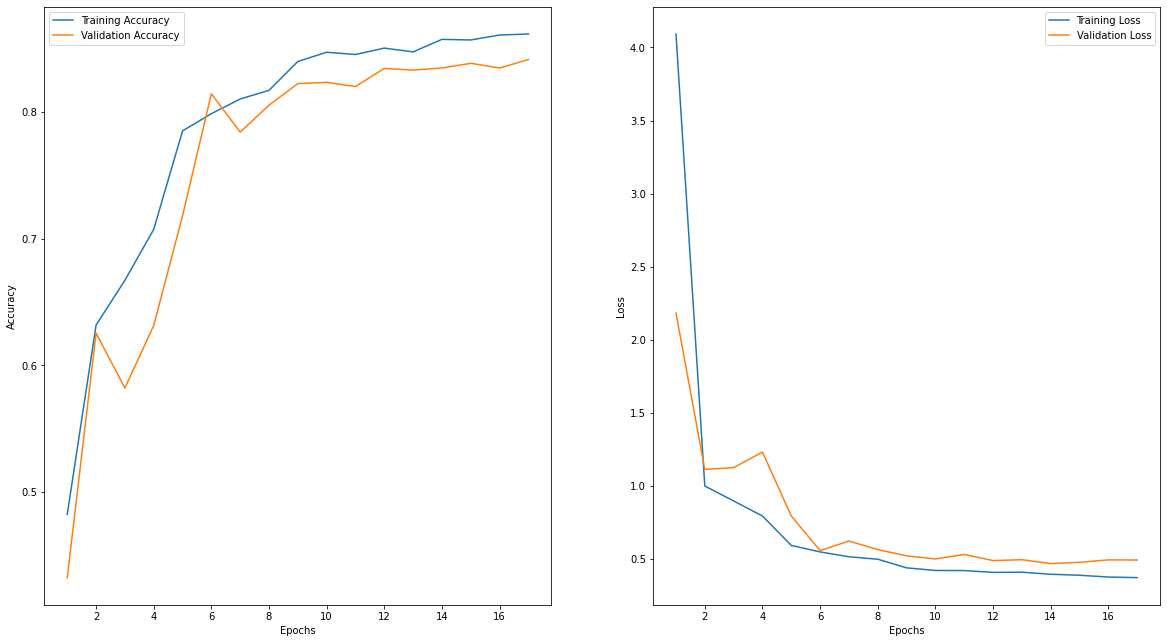

In [21]:
epoch_list = list(range(6, len(hist.history['accuracy']) + 1))
fig, axes = plt.subplots(1,2, figsize=(20,11))
epoch_list = list(range(1, len(hist.history['accuracy']) + 1))
axes[0].plot(epoch_list, hist.history['accuracy'], epoch_list, hist.history['val_accuracy'])
axes[0].legend(('Training Accuracy', 'Validation Accuracy'))
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[1].plot(epoch_list, hist.history['loss'], epoch_list, hist.history['val_loss'])
axes[1].legend(('Training Loss', 'Validation Loss'))
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')

plt.show()

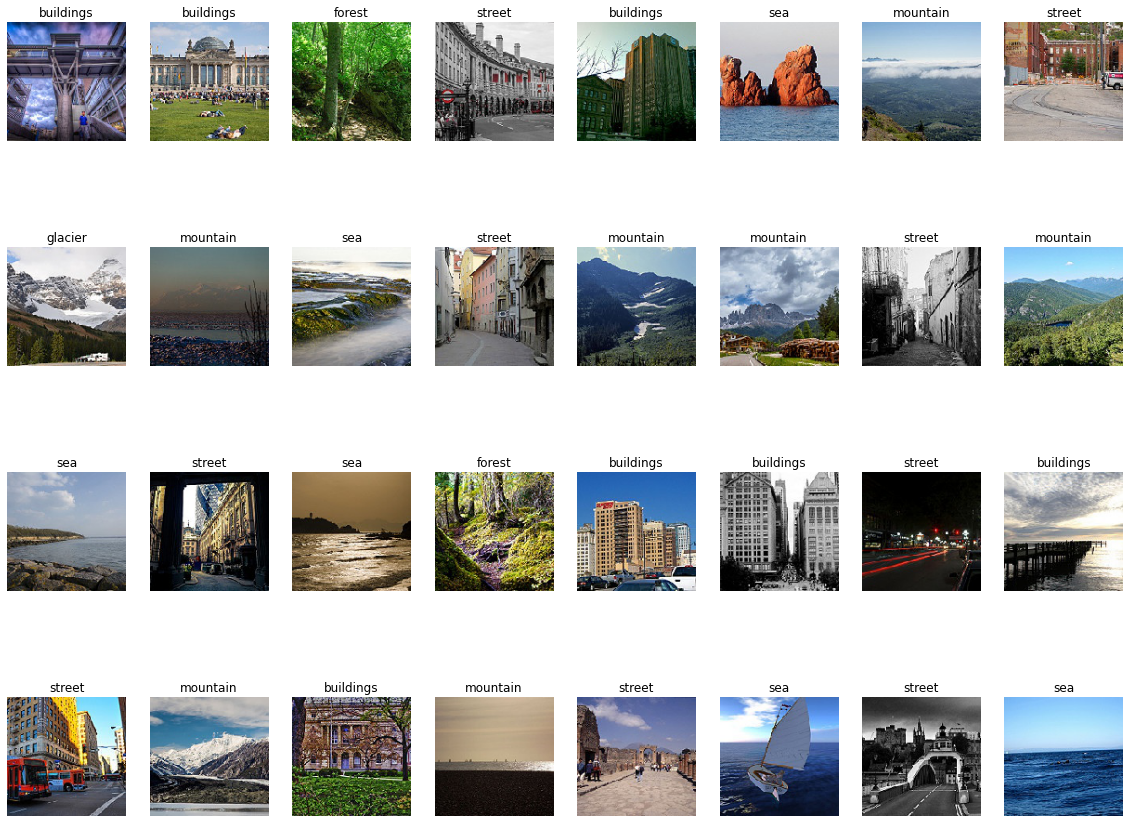

In [22]:
show_images(pred_gen)